# Assessing Different Architectures in Credit Card Fraud Detection

# 1. Introduction
The purpose of this project is to gain an understanding of the application of neural networks in the area of anomaly detection. Anomaly detection has seen wide application ranging from credit card fraud detection (financial institutions), network intrusion detection (intelligence agencies) to medical diagnosis (healthcare providers). Approaches to anomaly detection include support vector machine, K-nearest neighbor, neural networks, heuristic-based models and statistical approaches [1]. This project will focus on credit card fraud detection and the performance of 5 different autoencoder architectures will be assessed. 
<br>
[1] N. Moustafa, J. Hu and J. Slay, "A holistic review of Network Anomaly Detection Systems: A comprehensive
survey," Journal of Network and Computer Applications, vol. 128, pp. 33-55, 2019. 

# 2. Description of Dataset
The credit card fraud detection is obtained from Kaggle and can be downloaded via this link ( https://www.kaggle.com/mlg-ulb/creditcardfraud/data ). The dataset contains a total of __284,807 credit card transactions__ made in September 2013. These transactions are labelled and contain a total of __492 fraudulent transactions__, making it a very skewed dataset. Each transaction has 30 features which are the result of a principal component analysis of the original data to maintain confidentiality. The data has been standardized by dividing by their mean and scaling to unit variance via Scikit-Learn's standard scaler library. 

In [0]:
path = "/content/gdrive/My Drive/Colab Notebooks/MIE1516_Project/creditcard_display.csv" 
data = pd.read_csv(path)
data
# A snippet of the dataset is shown below. 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


# 3. Evaluation Matrices
The performance of the models will be assessed with the following 5 matrices: recall, precision, F1 score, precision at K (P@K) and MSE ratio. 
#### 1. Recall
$$recall = TP / (TP + FP)$$
Recall evaluates the ablity of the model to not mistakenly classify normal transactions as fraudulent transactions. As the value of threshold increases, the value of recall increases. The higher the value of recall, the higher the model performance.
#### 2. Precision
$$precision = TP / (TP + FN)$$
Precision measures the ability of the model to detect all fraudulent transactions. As the value of threshold increases. the value of precision decreases. The higher the value of precision, the higher the model performance.
#### 3. F1 Score
$$F1 = 2*(precision*recall) / (precision + recall)$$
There is tension between the values of recall and precision as the value of threshold is varied. A better metric is F1 score which is the harmonic average of both precision and recall. The "best F1 score" will be reported for each model. 
#### 4. Precision at K (P@K)
Precision at K measures the percentage of fraudulent transactions in the K transactions with the highest reconstruction error. The reconstruction error is calculated via mean squared error (MSE). P@K is a particularly relevant evaluation metric if a human operator is involved with dealing with the anomalous data. In the context of credit card fraud detection, a human operator will validate the output of the model and the credit card owner is subsequently contacted. The human operator can choose the transactions with the highest reconstruction error and as such, a ranking system like P@K is useful. P@K = 5, 10, 20, 50, 100 will be reported.
#### 5. MSE Ratio
$$MSE Ratio = MeanFraud MSE / Mean Normal MSE$$
There is often conflicting trends between F1 score and precision at K. As such a new metric, MSE ratio will be used. This is a useful metric as the primary factor used to classify a fraudulent transaction in the models presented here are based on the MSE reconstruction error. The larger the gap between the MSE of fradulent transactions relative to normal transactions, the better the performance of the model. 

# 4. The 5 Autoencoder Architectures
The purpose of an autoencoder here is to reconstruct the input. Generally, the output is the same as the input. The recontruction error, measured via mean squared error (MSE), will be used to classify the transactions as normal or fraudulent. A threshold is set such that any data with reconstruction error higher than the threshold will be classified as fraudulent. The idea is that the autoencoder is trained with normal training data and as such is able to reconstruct normal data much better compared to fraudulent data. The 4 models are shown below and will be covered in great details in subsequent sections. 
#### 1. Fully-Connected Autoencoder - A1 
![Fully Connected Auto-Encoder](images/fc_autoencoder.PNG)<br>
#### 2. LSTM / BLSTM Based Autoencoder - A5
<img src="images/A5_1.PNG" alt="A5_1.PNG" width = "350"/>
aaa
<img src="images/A5_1.PNG" width=350 />
aaa
![](images/A5_1.PNG)
#### 3. LSTM / BLSTM Based Autoencoder - A4
<img src="images/A4_1.PNG" alt="A4_1" width = "400"/>
#### 4. LSTM / BLSTM Based Autoencoder - A2 
<img src="images/A2.PNG" alt="A2" width = "700"/>

# 4.1. Fully-Connected Autoencoder - A1
![Fully Connected Auto-Encoder](images/fc_autoencoder.PNG)<br>
In the fully-connected autoencoder model (A1), the  input is compressed by the encoder to a latent variable, z with smaller dimensions. The decoder than reconstruct the data with this latent variable. The dimension reduction allows the model to learn relationships and correlations between the features. This intuition of compressing the data prior to reconstruction will later prove to limit the performance of the fully-connected autoencoder and will be revisited in Section 5. Here, the emphasis is on fully-connected encoder with a __compressed__ latent variable.   <br>
<br>
The base model for the fully-connected autoencoder is adapted from https://www.datascience.com/blog/fraud-detection-with-tensorflow. The model is shown below:
 ***
  __ FCA1_Original: Fully-Connected Autoencoder from Blog__
```
model.add(Dense(14, activation='tanh',activity_regularizer=regularizers.l1(1e-7), input_shape=(30,)))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='tanh'))
model.add(Dense(30,activation='relu'))
```
 ***
 <br>
 
The FC autoencoder is tuned to achieve higher performance:
<br><br>

 ***
 __FCA1_7: Tuned Fully-Connected Autoencoder__
```
model.add(Dense(25, activation='relu', input_shape=(30,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(30))
```
 ***
### Performance of A1 with Data Compression:
|Fully Connected Autoencoder|Description| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|FCA1_Original|30-->14-->7-->7-->30|0.3225| 0.2272|0.5555|20% | 40% | 35% | 42% | 23%|34.52
|FCA1_7|30-->25-->25-->30|0.4753|0.6022| 0.3925| 60% | 60% | 80% | 56% | 40%|248.27
|FCA1_5 |30-->100-->50-->15-->30 |0.3252 | 0.2272| 0.5714|40% | 50% | 45% | 42% | 28%|55.45|
The arrow sign in the 'Description' column depicts a dense layer.  It is observed that as the model is compressed further, the performance of the model decreases. In fact, as previously mentioned, much higher performance can be achieved without compressing out data and will be discussed in Section 5.
The confusion matrix for FCA1_7 is shown below:
![FCA1_7 Confusion Matrix](images/FCA1_7_confusion.PNG)
<br>
Looking at the scatter plot of the reconstruction error, the 2 points with the highest reconstruction errors are normal transactions. This is not surprising considering that legitimate transactions can be abnormal but not fraudulent. For example, a credit card user may make a sudden large purchase on an air ticket or purchased a pricey item / service due to emergency. 
![FCA1_7 MSE Scatter Plot](images/FCA1_7_scatter.PNG)

# 4.2. LSTM / BLSTM Based Autoencoder - A5
<img src="images/A5_1.PNG" alt="A5" style="width: 350px;"/>
<br>
Long Short Term Memory (LSTM) is suited to learn sequential patterns in long sequential data. The LSTM / BLSTM layer is used as there may be useful features to be extracted from a long sequence of transactions. By assessing the performance of this model, we are also testing whether a temporal pattern exist in the credit card transactions. With the A5 model, the performance actually benefits from compressing the feature slightly where the number of hidden units per cell is less than the feature number, i.e., 30. 

#### A5 Performance and LSTM v.s BLSTM:
 ***
 __BLSTMA5_3_5_20: Best A5 Model__
```
model.add(Bidirectional(LSTM(20, activation='relu', input_shape=(window,30), return_sequences=True)))
model.add(Bidirectional(LSTM(20, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(20, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(30)))
```
 ***

  ***
 __LSTMA5_2_5_15: Best LSTM Only Version__
```
model.add(LSTM(15, activation='relu', input_shape=(window,30), return_sequences=True))
model.add(LSTM(15, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(30)))
```
 ***
 
| Model| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- |
|BLSTMA5_3_5_20 (Best BLSTM model)|0.4892|0.7083| 0.3736| 40% | 50% | 55% | 48% | 39%|83.38
|LSTMA5_2_5_15 (Best LSTM Version)|0.3555| 0.25| 0.6153|0% | 10% | 50% | 48% |33%|41.18
The best A5 model achieved an F1 score of 0.4892 and MSE ratio of 83.38. P@20 of 55% is obtanied. Using bidirectional LSTM (BLSTM) provides an improvement in performance. In a BLSTM layer, there are 2 LSTM layers where one of the layers processes the input in the opposite direction. The output of the 2 LSTM layers are then concatenated. Using BLSTM layers increase the capacity of the model to learn sequential patterns or features from both direction. For comparison, the result of the best LSTM version, LSTMA5_2_5_15, is shown above.

The confusion matrix and scatter plot for BLSTMA5_3_5_20 is shown below:
![BLSTMA5_3_5_20 Confusion Matrix](images/BLSTMA5_3_5_20_confusion.PNG)
![BLSTMA5_3_5_20 MSE Scatter Plot](images/BLSTMA5_3_5_20_scatter.PNG)
Again, it is observed that the transaction with the highest MSE is a normal transaction. 
<br><br>
#### The model names are labeled as such: ModelType_NumberOfLayers_WindowSize_HiddenUnits
For e.g., BLSTMA5_3_5_15 is a BLSTM based A5 model with 3 layers, window size of 5 and 15 hidden units per cell.
 #### Effect of Hidden Units on BLSTM Based A5:
| BLSTM Based A5| Hidden Units|Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|BLSTMA5_3_5_15 |15|0.3492|0.4583|0.2820|0% | 0% | 10% | 30% | 27%|45.30|
|BLSTMA5_3_5_20 |20|0.4892|0.7083| 0.3736| 40% | 50% | 55% | 48% | 39%|83.38|
|BLSTMA5_3_5_50|50|0.2527|0.2395| 0.2674| 0% | 10% | 25% | 22% | 24%|41.34|
|BLSTMA5_3_5_200|200|0.2535|0.5520| 0.1645| 20% | 30% | 35% | 26% | 18%|67.53|

 #### Effect of Hidden Units on LSTM Based A5:
| LSTM Based A5| Hidden Units| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|LSTMA5_2_5_10|10|0.3582| 0.25| 0.6315|0% | 0% | 40% | 48% |30%|33.12
|LSTMA5_2_5_15|15|0.3555| 0.25| 0.6153|0% | 10% | 50% | 48% |33%|41.18
|LSTMA5_2_5_20| 20|0.1377| 0.3020|0.0892|0% | 0% |0% | 2% |10%|8.19
|LSTMA5_2_5_50|50|0.2597| 0.3125| 0.2222|0% | 0% |10% | 18% |20%|30.06
|LSTMA5_2_5_100|100|0.2004|0.5208| 0.1240|0% | 0% |10% | 14% |14%|26.66

It is clear from above that compressing the hidden units to a value smaller than the number of features improves performance. A larger number of hidden units can reduce the train and test loses, indicating that the model gets better in reconstructing the input. However, the larger number of hidden units negatively impact the models ability in detecting fraud as the model may learn how to reconstruct a fraudulent transaction.

#### Effect of Window Sizes
| BLSTM Based A5| Window Size|Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|BLSTMA5_3_5_20 |5|0.4892|0.7083| 0.3736| 40% | 50% | 55% | 48% | 39%|83.4
|BLSTMA5_3_20_20|20|0.3035|0.3451|0.2708|60% | 60% | 40% | 24% | 25%|111.88
|BLSTMA5_3_40_20|40|0.1818|0.16| 0.2105| 0% | 0% | 0% | 12% | 16%|16.72
A window size of 20 appears to perform well in terms of precision at K but not with F1 score. Due to this conflicting information, a new metric, MSE ratio, can be useful. MSE ratio is the ratio of mean fraud MSE to mean normal MSE. With MSE ratio, the window size of 20 appears to perform best and it can be argued tha this is indeed the best M2 model.
<br><br>
The goal of using an LSTM model is to capture sequential patterns in a long sequence of transactions or in a large window size. Overall, it is observed that a smaller window size tend to result in better performance which defeats the purpose of using an LSTM or BLSTM model.

# 4.3. LSTM / BLSTM Based Autoencoder - A4
<img src="images/A4_1.PNG" alt="A4" style="width: 350px;"/>
The A4 model is similar to A5 except that the output is shifted forward by one time step. This makes it difficult for the model to simply copy the input. The idea is to detect fraud and not to simply reconstruct an input. 

#### A4 Model Performance
 ***
 __BLSTMA4C_2_20_20_1: Best A4 Model__
```
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', input_shape=(window,30), return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(30)))
```
 BLSTMA4C_2_5_20 is also implemented as above with a different window size. 
 ***
##### The model names are labeled as such: ModelType_NumberOfLayers_WindowSize_HiddenUnits_Version<br>
For e.g., BLSTMA4C_2_20_20_1 is a BLSTM based A4 model with 2 layers, window size of 20 and 20 hidden units per cell.

|Best A4 Models|Number of Layers| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio|
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|BLSTMA4C_2_5_20 |2|0.3428|0.64|0.2341| 40% | 20% | 10% | 4% | 10%|42.42|
|BLSTMA4C_2_20_20_1 |20|0.1441|0.2844|0.09657| 100% | 50% | 25% | 14% | 10%|101.73|
BLSTMA4C_2_5_20 has the highest F1 score. If the objective is to detect as many fraud with low tolerance for false negatives, then BLSTMA4C_2_5_20 is a better performer. The confusion matrix for BLSTMA4C_2_5_20 is shown below.
![BLSTMA4C_2_5_20 Confusion Matrix](images/BLSTMA4C_2_5_20_confusion.PNG)
If the goal is to rank the transactions to flag for fraudulent transactions for verification by a human operator, then BLSTMA4C_2_20_20_1 is a better model with higher precision at K.
 
#### Using only LSTM layer results in very poor performance:
|Various LSTM Based A4 Models| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|LSTMA4C_1_5_20 | 0.03809 |0.02666| 0.06666| 0% | 0% | 0% | 4% | 2%|2.71|
|LSTMA4C_2_5_20 | 0.01652 |0.01333| 0.02173| 0% | 0% | 0% | 2% | 1%|1.62|
|LSTMA4C_3_5_20 | 0.02777 |0.02666|0.02898| 0% | 0% | 0% | 2% | 2%|2.26|
|LSTMA4C_2_5_100 | 0.04 |0.02666| 0.08| 0% | 0% | 0% | 4% | 2%|2.72|
|LSTMA4C_4_5_50 |0.01851 |0.0133| 0.03030| 0% | 0% | 0% | 2% | 1%|1.9076|
With the A4 model, the LSTM model is unable to learn how to reconstruct a forward shifted output, resulting in poor performance. Various numbers of stacked layers and hidden units all resulted in poor performance. The loss convergence is very slow with train and test losses above 0.6 (compared to <<0.1 with the BLSTM case). Due to the forward shift in the output, with only 1 direction (forward) of the LSTM layer, the model cannot properly reconstruct the desired output as the model does not see ahead. For example, at the reconstructed output of the first time step, the model has not "seen" the second time step. The BLSTM with the bidirectional layer improved the model performance as seen below. 

#### BLSTM Layer Improves performance of A4
|BLSTM Based A4|Window Size| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|BLSTMA4C_2_5_20 |5|0.3428|0.64|0.2341| 40% | 20% | 10% | 4% | 10%|42.42|
|BLSTMA4C_2_20_20_1 |20|0.1441|0.2844|0.09657| 100% | 50% | 25% | 14% | 10%|101.73|
|BLSTMA4C_2_30_20 | 30|0.1159 |  0.3707 | 0.06875 | 0% | 0% | 0% | 4% | 3%| 9.390 |
|BLSTMA4C_2_40_20 |40|0.02325 |  0.2142 |0.01229 | 0% | 0% | 0% | 0% | 0%| 1.8895 |
As the window size is inreased beyond 20, the model performance drops and the difference in reconstructing normal and anomalous transactions diminishes. Again, this indicates the redundancy of using an LSTM model as the model is not performing any meaningful feature extraction on the long sequence of credit card transactions. 

#### Changing the number of stacked layers:
|BLSTM Based A4|Number of Layers| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio|
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|BLSTMA4C_1_5_20 |1|0.05398| 0.28 |0.02987 | 20% | 10% | 10% | 4% | 2%| 8.65 |
|BLSTMA4C_2_5_20 |2|0.3428|0.64|0.2341| 40% | 20% | 10% | 4% | 10%|42.42|
|BLSTMA4C_3_5_20 |3|0.1421 | 0.36 |0.08852 | 0% | 0% | 5% | 4% | 4%| 14.42 |
|BLSTMA4C_4_5_20 |4|0.06904 | 0.3866 |0.03790 | 0% | 0% | 10% | 4% | 4%| 10.86|
From the table above. there is clearly an optimum number of stacked layers: 2 stacked layers. This applies in general to the other recurrent neural network based models in this report, where more than 4 layers generally results in poor performance. 


# 4.4. LSTM / BLSTM Based Autoencoder - A2
<img src="images/A2.PNG" alt="A2" style="width: 700px;"/>
In this model, the return sequence of the last LSTM / BLSTM layer of the encoder is set to false such that only the output from the last time step (latent variable, z in the figure above) is fed to the decoder. A repeat vector layer is needed to duplicate this output to the decoder. The implementation is shown in the code snippet below.<br>
<br>
 ***
 __LSTM_V3_4__
```
model.add(LSTM(300, activation='relu', input_shape=(window,30)))
model.add(RepeatVector(window))
model.add(LSTM(300, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(30)))
```
 ***

#### Performance of A2 Model
LSTM_V3_4 is the best A2 model. It uses a window size of 10, 1 LSTM layer per encoder / decoder and 300 hidden units. 

| Best A2 Model | Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- |
|LSTM_V3_4|0.30456|0.2777| 0.3370| 20% | 30% | 50% | 42% | 31%|32.07|
The confusion matrix and MSE scatter plot are shown below:
![LSTM_V3_4 Confusion Matrix](images/LSTM_V3_4_confusion.PNG)
![LSTM_V3_4 MSE Scatter Plot](images/LSTM_V3_4_scatter.PNG)


<br>
#### Effect of increasing the number of layers:
|LSTM Based A2|Hidden Units|Window Size| # of Layers|Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- | -- |
|LSTM_V3_4|300|10|1|0.30456|0.2777| 0.3370| 20% | 30% | 50% | 42% | 31%|32.07
|LSTM2_10_300|300|10|2|0.1254|0.1666|  0.1005| 20% | 40% | 25% | 14% | 12%|5.376
|LSTM_5_300|300|5|1|0.2389|0.395| 0.1711| 40% | 30% | 25% | 24% | 18%|79.31
|LSTM2_5_300|300|5|2| 0.2272| 0.3125|  0.1785| 20% | 30% | 20% | 20% | 19%|42.68
Increasing the number of layers worsens the performance as seen above. Note that this is the number of layers per encoder/decoder. 

#### Varrying the number of hidden units:
|LSTM Based A2 with1 Layer per Encoder and Window Size 10|Hidden Units| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- | -- |
|LSTM_10_50| 50|0.1585| 0.3611| 0.1015| 0% | 0% | 0% | 8% | 10%|10.67|
|LSTM_V3_3 |100|0.2008|0.2222| 0.1832| 20% | 50% | 35% | 16% | 17%|8.10|
|LSTM_V3_4| 300|0.30456|0.2777| 0.3370| 20% | 30% | 50% | 42% | 31%|32.07|
|LSTM_V3_8| 450|0.1428 |0.1296| 0.1590| 0% | 0% | 15% | 14% | 14%|11.32|
|LSTM_V3_6 |600|0.2408 |0.3333| 0.1884| 0% | 30% | 40% | 24% | 23%|27.09|
|LSTM_V3_9_1 |1000|0.2364 |0.3425|0.1804| 0% | 0% | 20% | 28% | 21%|18.2|
The model performs best at 300 hidden units per cell. 

#### Effect of increasing window size:
|LSTM Based A2 Model with 100 Hidden Units and 1 Layer per Encoder| Window Size|Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- | -- |
|LSTM_40_100|40|0.1781| 0.22| 0.1496| 0% | 0% | 10% | 14% | 16%|12.78|
|LSTM_V3|20|0.2742|0.2123|  0.3870| 40% | 20% | 30% | 38% | 26%|25.54|
|LSTM_V3_3| 10|0.2008|0.2222| 0.1832| 20% | 50% | 35% | 16% | 17%|8.10|
|LSTM_V3_1 |5 |0.1889 |0.3020| 0.1374| 20% | 10% | 5% | 12% | 12%|18.26|
|LSTM_1_100 |1 |0.7303 |0.7386| 0.7222| 100% | 100% | 95% | 86% | 65%| 6005.8|
Performance decreases with increasing window size. There are mainly 2 possible explanations for this result. First, there isn't any sequential pattern to learn across the transactions, as such, having a large window size does not help. Second, the percentage compression is greater for larger window size as the number of hidden units is fixed. As previously shown, more hidden units can improve performance. This is because the total number of features per window is large. Total number of features equals window size multipled by number of features per transaction.For example, with a window size of 20, there is a total of 600 features.  

#### Does BLSTM Layer Helps?
|Model|Hidden Units|Window Size| # of Layers|Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100| MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- | -- | -- |
|BLSTMA2_1_5_100|100|5|1|0.2169|0.3333| 0.1608| 0% | 30% | 30% | 16% | 15%|65.36|
|BLSTMA2_1_5_200|200|5|1|0.2456|0.3645| 0.1851| 40% | 40% | 20% | 20% | 19%|118.44|
|BLSTMA2_1_5_300|300|5|1|0.2608|0.28125|0.2432| 40% | 40% | 25% | 26% | 24%|132.19|
|BLSTMA2_1_5_400|400|5|1| 0.2392|0.2604|0.2212| 40% | 30% | 20% | 26% | 21%|106.6|
|BLSTMA2_2_5_200|200|5|2|0.2379|0.3854|0.1720| 40% | 20% | 25% | 24% | 22%|56.45|

BLSTM layer did not provide significant performance improvement while increasing training time.



# 5. Fully-Connected Autoencoder: Revisited!
It should be noted that when the window size of A2 is reduced to 1, the model performs exceptionally well. With window size of 1, the LSTM based A2 model (LSTM_1_100) is similar to a fully-connected autoencoder (A1) with some additional complexities of the gates. To isolate these complexities, a simple RNN model (RNN_1_100) is used and an improvement in performance is observed. A simple RNN model with only 1 time step is equivalent to a fully-connected network. This provided the hint that a fully-connected autoencoder with more neurons per layer without compressing the input can lead to better performance.  The implementation is shown in the code snippets below.<br>

***
 __LSTM_1_100__
```
model.add(LSTM(100, activation='relu', input_shape=(window,30)))
model.add(RepeatVector(window))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(30)))
```
 ***
 ***
 __RNN_1_100__
```
model.add(SimpleRNN(100, activation='relu', input_shape=(window,30)))
model.add(RepeatVector(window))
model.add(SimpleRNN(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(30)))
```
 ***
***
 __FCA1_100__
```
model.add(Dense(100, activation='relu', input_shape=(30,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(30))
```
 ***
 
|Different Architectures with Window Size of 1 and 100 Hidden Units| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio|
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|LSTM_1_100|0.7303 |0.7386| 0.7222| 100% | 100% | 95% | 86% | 65%| 6005.8|
|RNN_1_100|0.8227| 0.7386| 0.9285| 100% | 100% | 100% | 96% | 73%|25390.8|
|FCA1_100|0.8314| 0.8409| 0.8222| 100% | 100% | 95% | 86% | 74%|2496.2|
Indeed, a fully-connected autoencoder without compression gives excellent performance. 

#### Tuning the fully-connected autoencoder
|Fully-Connected Autoencoder| Window Size| Description| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio|
| --- | --- | --- | --- | --- | --- | --- | --- | -- |
|FCA1_2|1|  30-->150-->150-->30|0.8044 | 0.8181| 0.7912| 100% | 90% | 95% | 86% | 74%| 4281.8|
|FCA1_100|1| 30-->100-->100-->30|0.8314| 0.8409| 0.8222| 100% | 100% | 95% | 86% | 74%|2496.2|
|FCA1_1| 1|30-->50-->50-->30| 0.8181|0.8181|0.8181|100% | 100% | 90% | 80% | 74%|2965.6|
|FCA1_6 |1|30-->30-->30-->30| 0.8379|0.8522| 0.8241|100% | 100% | 100% | 90% | 75%|9300.8|
|FCA1_7| 1|30-->25-->25-->30| 0.4753 | 0.6022| 0.3925|60% | 60% | 80% | 56% | 40%|248.27|
|FCA1_5 |1|30-->100-->50-->15-->30 |0.3252 | 0.2272| 0.5714|40% | 50% | 45% | 42% | 28%|55.45|

In the previous fully-connected autoencoder section 4.1, the number of hidden units is limited to a small value. However, as we just seen, having more hidden units improved the performance of the model tremendously. FCA1_6 achieved F1 score of 0.838 and precision at K = 20 of 100%. 

The results above show that the fully-connected autoencoder performs well in detecting fraudulent transactions as long as the number of neurons per layer is equal to or exceeds the number of features, i.e., 30. Performance decreases sharply as the input is compressed to a lower dimension even if a larger number of neurons is used prior to compression as seen in FCA1_5.

The confusion matrix and MSE scatter plot of FCA1_6 is shown below:
![FCA1_6 Confusion Matrix](images/FCA1_6_confusion.PNG)
![FCA1_6 MSE Scatter Plot](images/FCA1_6_scatter.PNG)

# 6. Conclusion
A comparison of the best tuned models from each of the 4 main architectures is shown below:

| Best Tuned Model| Best F1 Score| Recall| Precision|P@ 5| P@10 |P@20 | P@50|P@100|MSE Ratio
| --- | --- | --- | --- | --- | --- | --- | --- |
|A1: FCA1_6| 0.8379|0.8522| 0.8241|100% | 100% | 100% | 90% | 75%|9300.8|
|A2: LSTM_V3_4|0.30456|0.2777| 0.3370| 20% | 30% | 50% | 42% | 31%|32.07|
|A4: BLSTMA4C_2_20_20_1|0.1441|0.2844|0.09657| 100% | 50% | 25% | 14% | 10%|101.73|
|A5: BLSTMA5_3_5_20 (Best BLSTM model)|0.4892|0.7083| 0.3736| 40% | 50% | 55% | 48% | 39%|83.38

The fully-connected autoencoder is an excellent fraud detector in this context, achieving an F1 score of 0.838 and P@20 of 100%. This excellent performance can be achieved if the data is not compressed to a smaller dimension than its number of features. It is concluded that the LSTM / BLSTM based autoencoders are ill-suited for this task for 2 main reasons:
-  The LSTM / BLSTM is unable to meaningfully extract features from larger window sizes. There may be an absent of temporal patterns in the credit card transactions.
-  Longer training time due to higher complexity.

# Implementing the Best A1 Model: FCA1_6

In [ ]:
from google.colab import drivae
drive.mount('/content/gdrive')

In [0]:
# Code for result visualization is obtained from the following blogs:
# https://www.datascience.com/blog/fraud-detection-with-tensorflow
# https://machinelearningmastery.com/lstm-autoencoders/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, GRU, Concatenate, Dropout, Bidirectional
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import regularizers
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import RepeatVector
from tensorflow.python.keras.layers import TimeDistributed
from tensorflow.python.keras.utils import plot_model
import tensorflow.python.keras
from tensorflow.python.keras.callbacks import LearningRateScheduler
import copy
import pickle
import func as f


In [2]:
path = 'creditcard.csv'
window = 1
train_x,test_x,test_y,feature_no = f.load_data_fc(path,window)

In [3]:
tf.reset_default_graph()
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(30,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
Total params: 2,790
Trainable params: 2,790
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.load_weights('checkpoint/FCA1_6.h5')
pickle_in = open('checkpoint/FCA1_6','rb')
history = pickle.load(pickle_in)

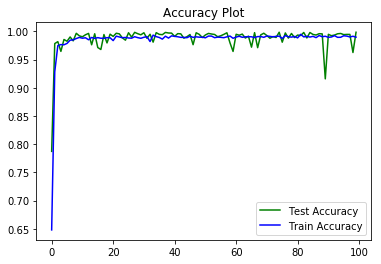

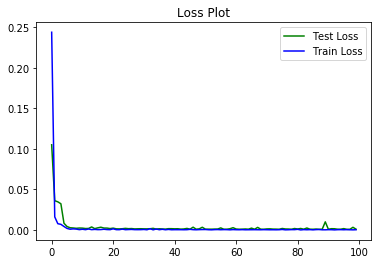

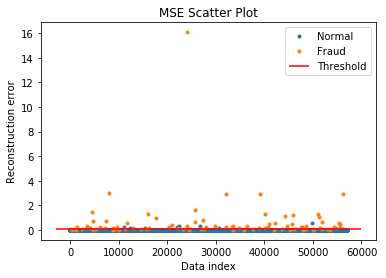

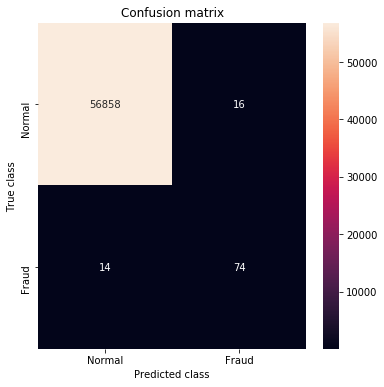

Best F1 score: 0.8379888268156425
Recall at best F1 score: 0.8522727272727273
Precision at best F1 score: 0.8241758241758241
Precision at K = 5 : 100.0 %
Precision at K = 10 : 100.0 %
Precision at K = 20 : 100.0 %
Precision at K = 50 : 91.07142857142857 %
Precision at K = 100 : 76.41509433962264 %
MSE Ratio: 9300.811758162408


In [5]:
f.plot_history(history)
max_F1_index,max_F1,precision, recall, threshold,error_df = f.error_fc (test_y,test_x,model)
threshold_fixed = f.MSE_scatter(max_F1_index,error_df,threshold)
f.conf_matrix(threshold_fixed, error_df)
f.print_results(max_F1,max_F1_index, recall, precision,error_df)

# Implementing the Best A2 Model: LSTM_V3_4

In [0]:
path = 'creditcard.csv'
window = 10
train_x,test_x,test_y,feature_no = f.load_data(path,window)

In [0]:
hidden_layer_size = 300
tf.reset_default_graph()
model = Sequential()
model.add(LSTM(hidden_layer_size, activation='relu', input_shape=(window,30)))
model.add(RepeatVector(window))
model.add(LSTM(hidden_layer_size, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(30)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               397200    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 300)           721200    
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 30)            9030      
Total params: 1,127,430
Trainable params: 1,127,430
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights('checkpoint/LSTM_V3_4.h5')
pickle_in = open('checkpoint/LSTM_V3_4','rb')
history = pickle.load(pickle_in)

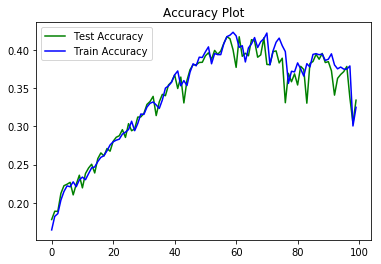

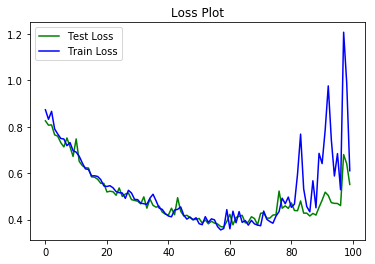

C:\Users\Lab7129\Desktop\MIE1516\MIE1516 Project\func.py:129: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


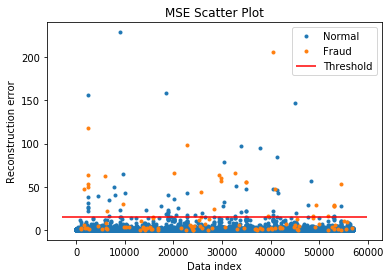

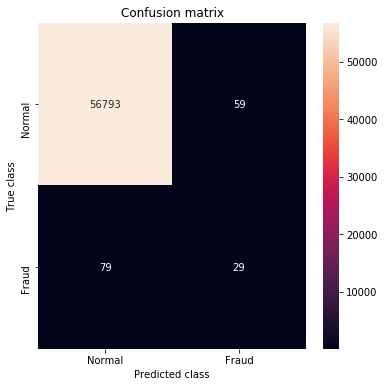

Best F1 score: 0.3045685279187817
Recall at best F1 score: 0.2777777777777778
Precision at best F1 score: 0.33707865168539325
Precision at K = 5 : 20.0 %
Precision at K = 10 : 30.0 %
Precision at K = 20 : 50.0 %
Precision at K = 50 : 42.0 %
Precision at K = 100 : 31.0 %
MSE Ratio: 32.07814444916739


In [0]:
f.plot_history(history)
max_F1_index,max_F1,precision, recall, threshold,error_df = f.error (test_y,test_x,model)
threshold_fixed = f.MSE_scatter(max_F1_index,error_df,threshold)
f.conf_matrix(threshold_fixed, error_df)
f.print_results(max_F1,max_F1_index, recall, precision,error_df)

#### With early stopping, performance reduced...

In [0]:
model.load_weights('checkpoint/LSTM_V3_4_1.h5')
pickle_in = open('checkpoint/LSTM_V3_4_1','rb')
history = pickle.load(pickle_in)

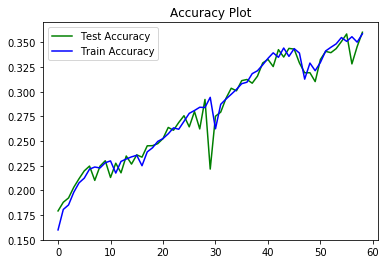

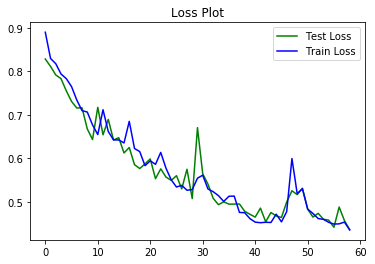

C:\Users\Lab7129\Desktop\MIE1516\MIE1516 Project\func.py:129: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


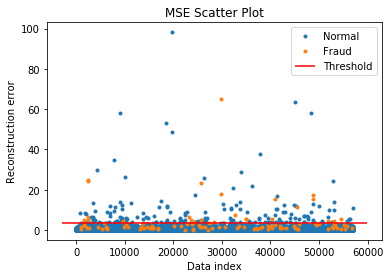

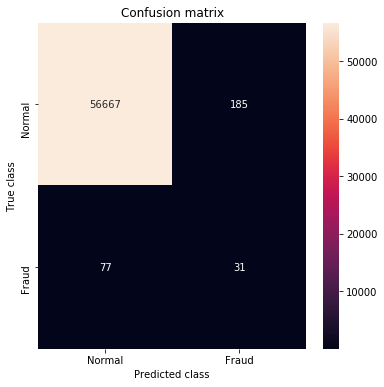

Best F1 score: 0.1969230769230769
Recall at best F1 score: 0.2962962962962963
Precision at best F1 score: 0.14746543778801843
Precision at K = 5 : 20.0 %
Precision at K = 10 : 10.0 %
Precision at K = 20 : 25.0 %
Precision at K = 50 : 18.0 %
Precision at K = 100 : 12.0 %
MSE Ratio: 9.015843008470387


In [0]:
f.plot_history(history)
max_F1_index,max_F1,precision, recall, threshold,error_df = f.error (test_y,test_x,model)
threshold_fixed = f.MSE_scatter(max_F1_index,error_df,threshold)
f.conf_matrix(threshold_fixed, error_df)
f.print_results(max_F1,max_F1_index, recall, precision,error_df)

# Implementing the Best A5 Model: BLSTMA5_3_5_20

In [0]:
path = 'creditcard.csv'
window = 5
train_x,test_x,test_y,feature_no = f.load_data(path,window)

In [0]:
hidden_layer_size = 20
tf.reset_default_graph()
model = Sequential()
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', input_shape=(window,30), return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(30)))

In [0]:
def lr_schedule(epoch):
    lr = 0.001
    if epoch>20:
        lr = 0.0001
    if epoch>40:
        lr = 0.00005
    return lr
epoch = 150
batch_size = 128
opt = tensorflow.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(metrics = ['accuracy'],optimizer=opt, loss='mse')
#model.load_weights('/content/gdrive/My Drive/Colab Notebooks/MIE1516_Project/checkpoint/BLSTMA5_3_5_20.h5')
history = model.fit(train_x, train_x,
                    epochs=epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    callbacks=[LearningRateScheduler(lr_schedule)]).history

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8160      
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  9760      
_________________________________________________________________
bidirectional_2 (Bidirection multiple                  9760      
_________________________________________________________________
time_distributed (TimeDistri multiple                  1230      
Total params: 28,910
Trainable params: 28,910
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights('checkpoint/BLSTMA5_3_5_20.h5')
pickle_in = open('checkpoint/BLSTMA5_3_5_20','rb')
history = pickle.load(pickle_in)

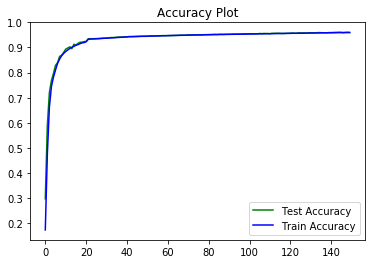

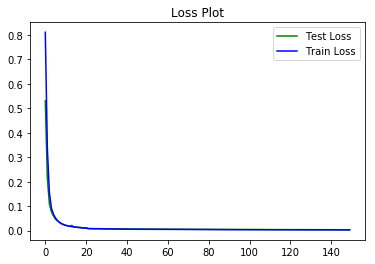

C:\Users\Lab7129\Desktop\MIE1516\MIE1516 Project\func.py:129: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


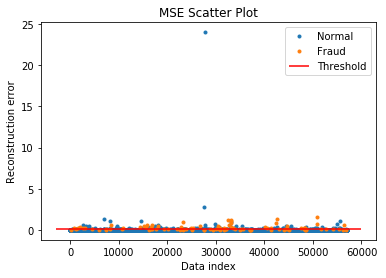

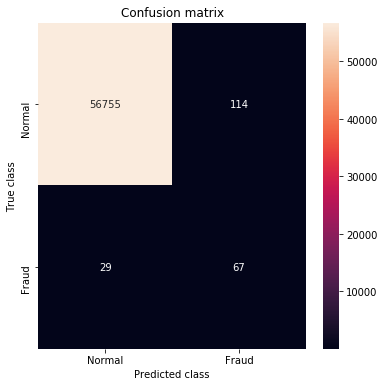

Best F1 score: 0.48920863309352514
Recall at best F1 score: 0.7083333333333334
Precision at best F1 score: 0.37362637362637363
Precision at K = 5 : 40.0 %
Precision at K = 10 : 50.0 %
Precision at K = 20 : 55.00000000000001 %
Precision at K = 50 : 48.0 %
Precision at K = 100 : 39.0 %
MSE Ratio: 83.38664918143043


In [0]:
f.plot_history(history)
max_F1_index,max_F1,precision, recall, threshold,error_df = f.error (test_y,test_x,model)
threshold_fixed = f.MSE_scatter(max_F1_index,error_df,threshold)
f.conf_matrix(threshold_fixed, error_df)
f.print_results(max_F1,max_F1_index, recall, precision,error_df)

# Implementing the Best A4 Model: BLSTMA4C_2_5_20 and BLSTMA4C_2_20_20_1

### BLSTMA4C_2_5_20

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, GRU, Concatenate, Dropout, Bidirectional
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import regularizers
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import RepeatVector
from tensorflow.python.keras.layers import TimeDistributed
from tensorflow.python.keras.utils import plot_model
import tensorflow.python.keras
from tensorflow.python.keras.callbacks import LearningRateScheduler
import copy
import pickle
import func as f


In [0]:
path = 'creditcard.csv'
window = 5
train_x,test_x,test_y,feature_no, train_x_red, test_x_red, test_y_red = f.load_data_a4(path,window)

In [0]:
hidden_layer_size = 20
tf.reset_default_graph()
model = Sequential()
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', input_shape=(window,30), return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(30)))

In [0]:
epoch = 150
batch_size = 128
opt = tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(metrics = ['accuracy'],optimizer=opt, loss='mse')
#model.load_weights('/content/gdrive/My Drive/Colab Notebooks/MIE1516_Project/checkpoint/BLSTMA4C_2_5_20.h5')
history = model.fit(train_x, train_x_red,
                    epochs=epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x_red)).history

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8160      
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  9760      
_________________________________________________________________
time_distributed (TimeDistri multiple                  1230      
Total params: 19,150
Trainable params: 19,150
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights('checkpoint/BLSTMA4C_2_5_20.h5')
pickle_in = open('checkpoint/BLSTMA4C_2_5_20','rb')
history = pickle.load(pickle_in)

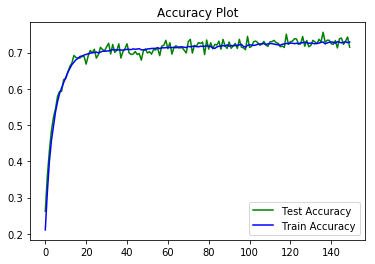

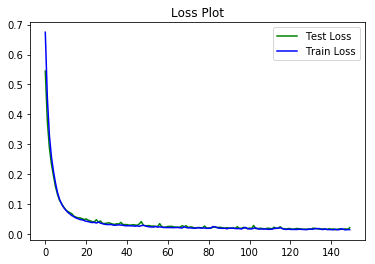

C:\Users\Lab7129\Desktop\MIE1516\MIE1516 Project\func.py:190: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


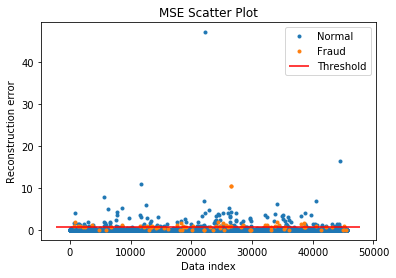

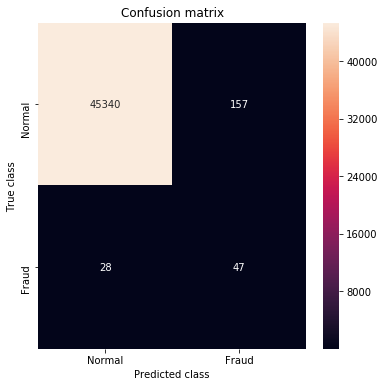

Best F1 score: 0.3428571428571429
Recall at best F1 score: 0.64
Precision at best F1 score: 0.23414634146341465
Precision at K = 5 : 40.0 %
Precision at K = 10 : 20.0 %
Precision at K = 20 : 10.0 %
Precision at K = 50 : 4.0 %
Precision at K = 100 : 10.0 %
MSE Ratio: 42.42737440658237


In [0]:
f.plot_history(history)
max_F1_index,max_F1,precision, recall, threshold,error_df = f.error_a4 (test_y,test_x,model,window,test_x_red)
threshold_fixed = f.MSE_scatter(max_F1_index,error_df,threshold)
f.conf_matrix(threshold_fixed, error_df)
f.print_results(max_F1,max_F1_index, recall, precision,error_df)

### BLSTMA4C_2_20_20_1

In [0]:
path = 'creditcard.csv'
window = 20
train_x,test_x,test_y,feature_no, train_x_red, test_x_red, test_y_red = f.load_data_a4(path,window)

In [0]:
hidden_layer_size = 20
tf.reset_default_graph()
model = Sequential()
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', input_shape=(window,30), return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_layer_size, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(30)))

In [0]:
epoch = 80
batch_size = 128
opt = tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(metrics = ['accuracy'],optimizer=opt, loss='mse')
#model.load_weights('/content/gdrive/My Drive/Colab Notebooks/MIE1516_Project/checkpoint/BLSTMA4C_2_20_20_1.h5')
history = model.fit(train_x, train_x_red,
                    epochs=epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x_red)).history

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8160      
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  9760      
_________________________________________________________________
time_distributed (TimeDistri multiple                  1230      
Total params: 19,150
Trainable params: 19,150
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights('checkpoint/BLSTMA4C_2_20_20_1.h5')
pickle_in = open('checkpoint/BLSTMA4C_2_20_20_1','rb')
history = pickle.load(pickle_in)

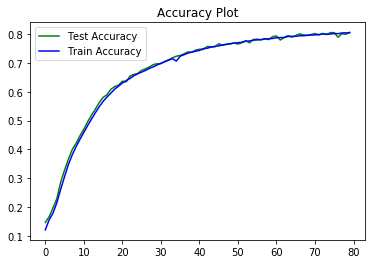

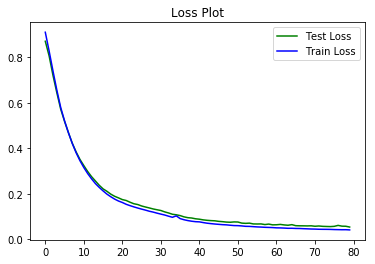

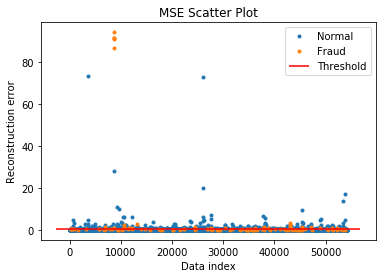

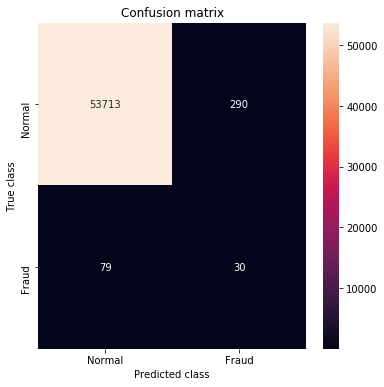

Best F1 score: 0.1441860465116279
Recall at best F1 score: 0.28440366972477066
Precision at best F1 score: 0.09657320872274143
Precision at K = 5 : 100.0 %
Precision at K = 10 : 50.0 %
Precision at K = 20 : 25.0 %
Precision at K = 50 : 14.000000000000002 %
Precision at K = 100 : 10.0 %
MSE Ratio: 101.73641521389034


In [0]:
f.plot_history(history)
max_F1_index,max_F1,precision, recall, threshold,error_df = f.error_a4 (test_y,test_x,model,window,test_x_red)
threshold_fixed = f.MSE_scatter(max_F1_index,error_df,threshold)
f.conf_matrix(threshold_fixed, error_df)
f.print_results(max_F1,max_F1_index, recall, precision,error_df)